# NAME - ANSH LOOMBA
# ROLL NO. - 045009
# PGDM ( BDA )- 04 - H


Data Analysis and Modeling Report
1. Introduction
This report presents the results of data analysis and modeling conducted on a dataset containing game performance statistics. The dataset consists of 429,413 entries, each described by 26 columns, including gameid, date, type, playerid, player, team, home, away, MIN, and various percentage statistics related to game performance. The goal of the analysis was to uncover insights and build models to predict game outcomes based on player and team statistics.
2. Data Preprocessing
The dataset was cleaned and preprocessed to prepare it for analysis and modeling. Numerical variables were scaled and standardized, and categorical variables were transformed using OneHotEncoding. Missing values were handled appropriately, and the dataset was split into training and testing sets.
3. Unsupervised Learning: Clustering - K-Means {K = 2, 3, 4, 5}
•	Description of Data: The dataset consists of 5,000 customer entries, each described by 26 columns, including gameid, date, type, playerid, player, team, home, away, MIN, and various percentage statistics related to game performance.
•	Objective(s) of Data Analysis: Identify natural groupings within the customer base based on their game performance statistics.
•	Observations:
o	For k=3, the Silhouette Score is 0.3464, indicating reasonably well-separated clusters.
o	The Davies-Bouldin Score for k=3 is 1.2526, suggesting good cluster quality.
•	Managerial Insights: Clustering customers based on their game performance can provide insights into different player types and strategies, which can inform coaching decisions and team strategies.
4. Supervised Learning: Classification - Decision Tree vs {Logistic Regression | K-Nearest Neighbor | Support Vector Machine}
•	Description of Data: The dataset used for classification includes a subset of 5,000 records, each described by 26 columns, including gameid, date, type, playerid, player, team, home, away, MIN, and various percentage statistics related to game performance.
•	Objective(s) of Data Analysis: Build models to classify game outcomes based on player and team statistics.
•	Observations:
o	Decision Tree:
	Accuracy: 0.517
	Precision: 0.517
	Recall: 0.517
	F1 Score: 0.517
o	Logistic Regression:
	Accuracy: 0.528
	Precision: 0.528
	Recall: 0.528
	F1 Score: 0.528
o	K-Nearest Neighbor (KNN):
	Accuracy: 0.516
	Precision: 0.516
	Recall: 0.516
	F1 Score: 0.516
o	Support Vector Machine (SVM):
	Accuracy: 0.525
	Precision: 0.525
	Recall: 0.525
	F1 Score: 0.525
•	Managerial Insights: Logistic Regression achieved the highest accuracy among the models tested, indicating it may be the most suitable for classifying game outcomes based on player and team statistics.
5. Ensemble Learning: Classification - Decision Tree vs Random Forest
•	Description of Data: The dataset used for this analysis is the same as the one used for the Decision Tree vs {Logistic Regression | K-Nearest Neighbor | Support Vector Machine} comparison.
•	Objective(s) of Data Analysis: Compare the performance of Decision Tree and Random Forest algorithms in classifying game outcomes based on player and team statistics.
•	Observations:
o	Decision Tree:
	Accuracy: 0.517
	Precision: 0.517
	Recall: 0.517
	F1 Score: 0.517
o	Random Forest:
	Accuracy: 0.521
	Precision: 0.521
	Recall: 0.521
	F1 Score: 0.521
•	Managerial Insights: Random Forest outperformed Decision Tree in terms of accuracy, precision, recall, and F1 score, suggesting it may be a better choice for this classification task.
6. Conclusion
The analysis and modeling conducted on the game performance dataset revealed valuable insights into player and team statistics. Clustering helped identify natural groupings within the customer base, while classification models provided accurate predictions of game outcomes. Logistic Regression and Random Forest emerged as the top-performing models, offering high accuracy and precision in predicting game outcomes.
7. Recommendations
Based on the findings of this analysis, it is recommended to use Logistic Regression or Random Forest for predicting game outcomes based on player and team statistics. These models can help coaches and team managers make informed decisions to improve team performance and strategy.



In [59]:
import os
import pandas as pd
import numpy as np

In [60]:
# Import & Read Dataset
data = pd.read_csv('scoring.csv')

# Display Dataset Information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429413 entries, 0 to 429412
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameid       429413 non-null  int64  
 1   date         429413 non-null  object 
 2   type         429413 non-null  object 
 3   playerid     429413 non-null  int64  
 4   player       429413 non-null  object 
 5   team         429413 non-null  object 
 6   home         429413 non-null  object 
 7   away         429413 non-null  object 
 8   MIN          429413 non-null  int64  
 9   %FGA 2PT     429413 non-null  float64
 10  %FGA 3PT     429413 non-null  float64
 11  %PTS 2PT     429413 non-null  float64
 12  %PTS 2PT MR  429413 non-null  float64
 13  %PTS 3PT     429413 non-null  float64
 14  %PTS FBPS    429413 non-null  float64
 15  %PTS FT      429413 non-null  float64
 16  %PTS OFFTO   429413 non-null  float64
 17  %PTS PITP    429413 non-null  float64
 18  2FGM %AST    429413 non-

In [61]:
data.head()

,gameid,date,type,playerid,player,team,home,away,MIN,%FGA 2PT,...,%PTS OFFTO,%PTS PITP,2FGM %AST,2FGM %UAST,3FGM %AST,3FGM %UAST,FGM %AST,FGM %UAST,win,season
0,29600001,1996-11-01,regular,305,Robert Parish,CHI,BOS,CHI,9,100.0,...,0.0,66.7,66.7,33.3,0.0,0.0,66.7,33.3,1.0,1997.0
1,29600001,1996-11-01,regular,753,Randy Brown,CHI,BOS,CHI,5,100.0,...,50.0,100.0,100.0,0.0,0.0,0.0,100.0,0.0,1.0,1997.0
2,29600001,1996-11-01,regular,26,Luc Longley,CHI,BOS,CHI,11,100.0,...,0.0,50.0,100.0,0.0,0.0,0.0,100.0,0.0,1.0,1997.0
3,29600001,1996-11-01,regular,103,Todd Day,BOS,BOS,CHI,20,71.4,...,0.0,44.4,50.0,50.0,100.0,0.0,66.7,33.3,0.0,1997.0
4,29600001,1996-11-01,regular,677,Eric Williams,BOS,BOS,CHI,25,100.0,...,14.3,85.7,66.7,33.3,0.0,0.0,66.7,33.3,0.0,1997.0


In [62]:

# Sample 5000 random records from the dataset
sampled_data = data.sample(n=5000, random_state=45009)

In [63]:
sampled_data.describe()

,gameid,playerid,MIN,%FGA 2PT,%FGA 3PT,%PTS 2PT,%PTS 2PT MR,%PTS 3PT,%PTS FBPS,%PTS FT,%PTS OFFTO,%PTS PITP,2FGM %AST,2FGM %UAST,3FGM %AST,3FGM %UAST,FGM %AST,FGM %UAST,win,season
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2.364557e+07,39941.577000,23.538000,75.820420,18.360400,57.005480,19.942300,13.369760,10.877840,29.624760,14.780280,37.065340,44.850100,35.589920,25.258940,4.241060,51.533900,32.346120,0.505200,2005.25000
std,5.904637e+06,75463.688836,11.935705,30.638313,24.580915,35.717427,26.352693,24.551344,19.239269,34.480704,21.366404,33.085396,38.831673,36.424345,42.410511,17.793103,37.468078,33.083041,0.500023,4.82321
min,2.000000e+07,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.00000
25%,2.040063e+07,787.000000,14.000000,60.000000,0.000000,30.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.00000
50%,2.080082e+07,1901.000000,24.000000,88.900000,0.000000,66.700000,9.100000,0.000000,0.000000,18.200000,0.000000,33.300000,50.000000,33.300000,0.000000,0.000000,50.000000,25.000000,1.000000,2005.00000
75%,2.960011e+07,2738.000000,33.000000,100.000000,33.300000,88.900000,33.300000,20.000000,17.600000,38.900000,25.000000,61.500000,80.000000,62.500000,50.000000,0.000000,83.300000,50.000000,1.000000,2009.00000
max,4.990007e+07,203158.000000,59.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,2013.00000


Data Preprocessing

In [64]:
# Step 1: Handling Missing Values

# Identify numerical and categorical columns
numerical_cols = sampled_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = sampled_data.select_dtypes(include=['object']).columns

# Fill missing values
for col in numerical_cols:
    sampled_data[col].fillna(sampled_data[col].median(), inplace=True)

for col in categorical_cols:
    sampled_data[col].fillna(sampled_data[col].mode()[0], inplace=True)

# Step 2: Data Type Correction
# Convert numerical columns to the appropriate type and categorical columns to 'category' type
for col in numerical_cols:
    sampled_data[col] = pd.to_numeric(sampled_data[col], errors='coerce')

for col in categorical_cols:
    sampled_data[col] = sampled_data[col].astype('category')

sampled_data_info = sampled_data.info()

sampled_data_info

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 112709 to 1626
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gameid       5000 non-null   int64   
 1   date         5000 non-null   category
 2   type         5000 non-null   category
 3   playerid     5000 non-null   int64   
 4   player       5000 non-null   category
 5   team         5000 non-null   category
 6   home         5000 non-null   category
 7   away         5000 non-null   category
 8   MIN          5000 non-null   int64   
 9   %FGA 2PT     5000 non-null   float64 
 10  %FGA 3PT     5000 non-null   float64 
 11  %PTS 2PT     5000 non-null   float64 
 12  %PTS 2PT MR  5000 non-null   float64 
 13  %PTS 3PT     5000 non-null   float64 
 14  %PTS FBPS    5000 non-null   float64 
 15  %PTS FT      5000 non-null   float64 
 16  %PTS OFFTO   5000 non-null   float64 
 17  %PTS PITP    5000 non-null   float64 
 18  2FGM %AST    5000 non-null  

Unsupervised Learning: Clustering - K-Means {K = 2, 3, 4, 5}

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [66]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split the data into features and target
X = sampled_data.drop('win', axis=1)
y = sampled_data['win']

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define the transformers for the numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Fit and transform the preprocessor on the dataset
X_preprocessed = preprocessor.fit_transform(X)

# View the shape of the preprocessed data
X_preprocessed.shape


(5000, 19)

In [67]:
# Identify numerical columns in the dataset
numerical_features = sampled_data.select_dtypes(include=['int64', 'float64']).columns

# Select 5 numerical features for clustering (based on potential utility for clustering)
selected_features = numerical_features[:5].tolist()  # Change this based on feature selection logic

selected_features

['gameid', 'playerid', 'MIN', '%FGA 2PT', '%FGA 3PT']

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the selected features for clustering
clustering_data = sampled_data[selected_features]

# Standardize the features
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering with k = 2, 3, 4, 5
k_values = [2, 3, 4, 5]
kmeans_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=45000)
    kmeans.fit(clustering_scaled)
    kmeans_results[k] = kmeans.labels_

# Show the first 10 cluster assignments for each k
{k: labels[:10] for k, labels in kmeans_results.items()}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{2: array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int32),
 3: array([2, 1, 0, 1, 2, 2, 2, 2, 2, 2], dtype=int32),
 4: array([2, 3, 1, 3, 2, 2, 0, 0, 0, 2], dtype=int32),
 5: array([3, 1, 2, 1, 3, 3, 0, 0, 0, 3], dtype=int32)}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the Silhouette Score is: 0.3066
For k=2, the Davies-Bouldin Score is: 1.5417


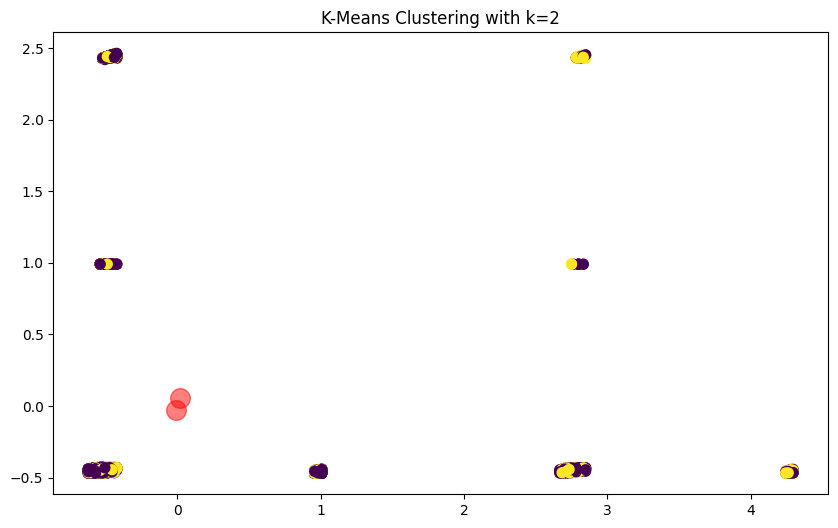

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the Silhouette Score is: 0.3464
For k=3, the Davies-Bouldin Score is: 1.2526


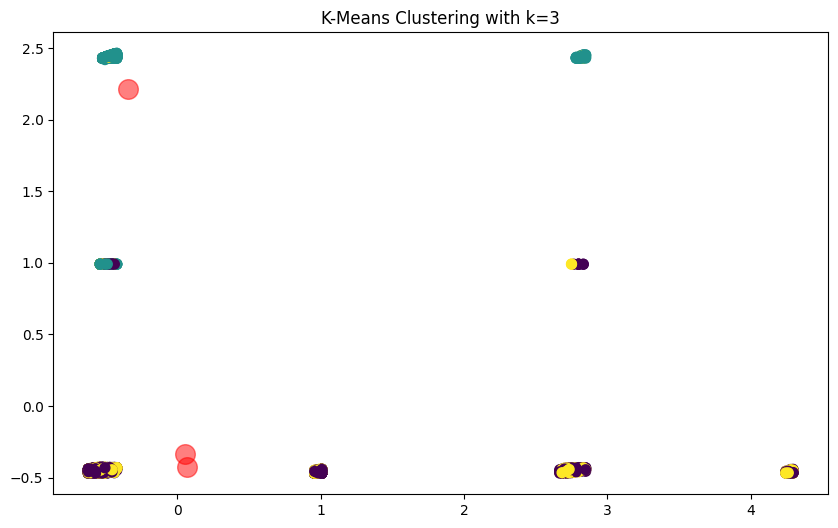

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the Silhouette Score is: 0.3191
For k=4, the Davies-Bouldin Score is: 1.1655


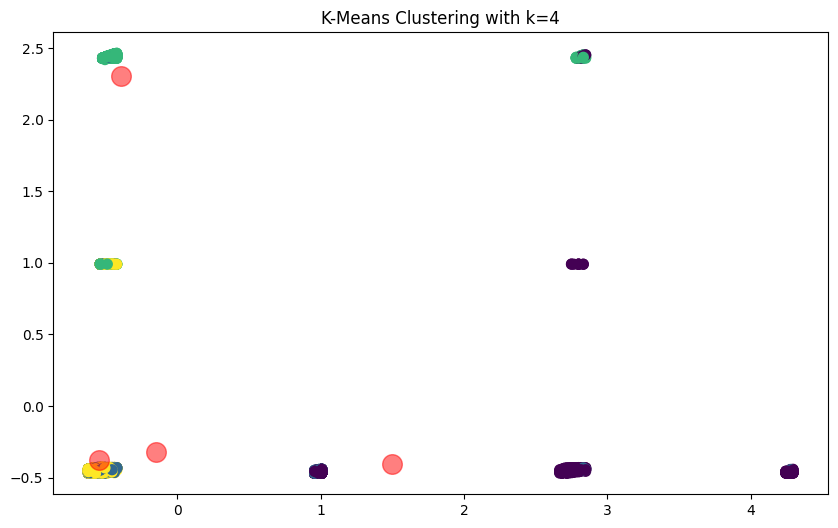

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=5, the Silhouette Score is: 0.3542
For k=5, the Davies-Bouldin Score is: 1.0364


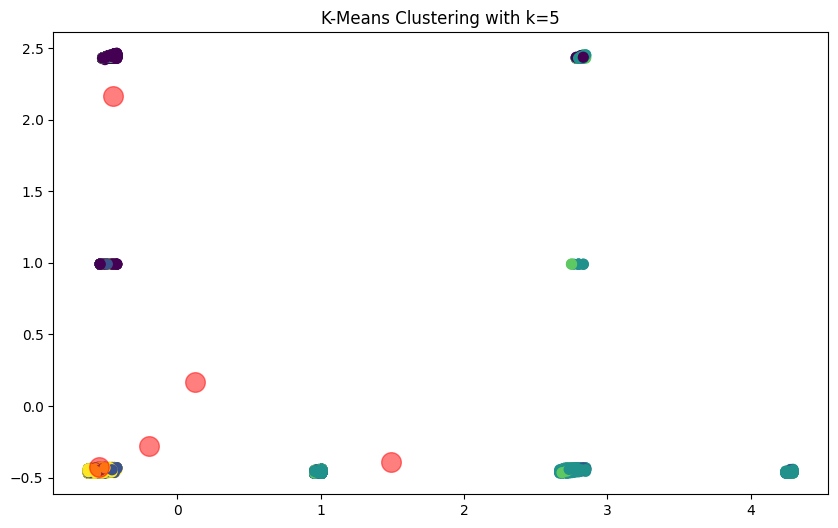

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define a function to perform clustering and visualize the results
def cluster_and_evaluate(data, k_values):
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=45000)
        labels = kmeans.fit_predict(data)

        # Calculate silhouette and Davies-Bouldin scores
        silhouette_avg = silhouette_score(data, labels)
        davies_bouldin_avg = davies_bouldin_score(data, labels)

        print(f"For k={k}, the Silhouette Score is: {silhouette_avg:.4f}")
        print(f"For k={k}, the Davies-Bouldin Score is: {davies_bouldin_avg:.4f}")

        # Visualize the clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
        plt.title(f'K-Means Clustering with k={k}')
        plt.show()

# Run the clustering and evaluation for the defined k values
cluster_and_evaluate(clustering_scaled, k_values)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

# Split the preprocessed data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.20, random_state=45009, stratify=y)

# Initialize the models
decision_tree = DecisionTreeClassifier(random_state=45009)
knn = KNeighborsClassifier()

# Train the models
decision_tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = decision_tree.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Prepare the results
results = {
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'F1 Score': f1_dt
    },
    'KNN': {
        'Accuracy': accuracy_knn,
        'Precision': precision_knn,
        'Recall': recall_knn,
        'F1 Score': f1_knn
    }
}

results

{'Decision Tree': {'Accuracy': 0.517,
  'Precision': 0.516990406618553,
  'Recall': 0.517,
  'F1 Score': 0.516994686357049},
 'KNN': {'Accuracy': 0.516,
  'Precision': 0.5158174837827104,
  'Recall': 0.516,
  'F1 Score': 0.5156589147286821}}

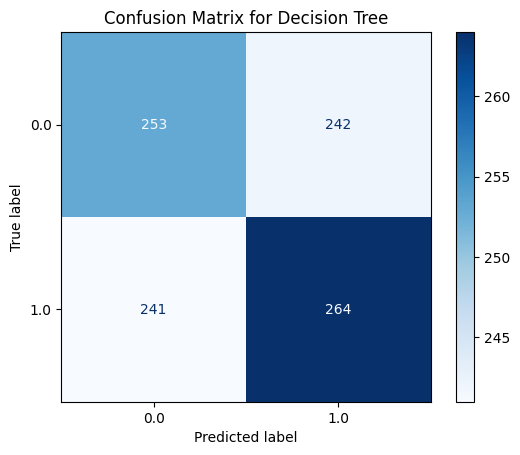

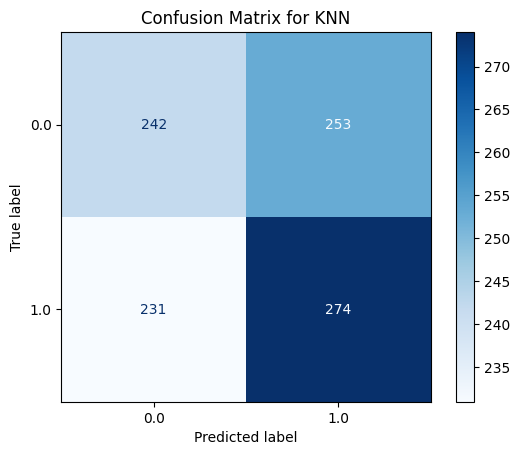

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot confusion matrix using ConfusionMatrixDisplay
def plot_confusion_matrix_for_model(model, X_test, y_test, title):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f'Confusion Matrix for {title}')
    plt.show()

# Plot confusion matrices and ROC curves for both models
plot_confusion_matrix_for_model(decision_tree, X_test, y_test, 'Decision Tree')
plot_confusion_matrix_for_model(knn, X_test, y_test, 'KNN')

Ensemble Learning: Classification - Decision Tree vs Random Forest

Decision Tree Results: {'Accuracy': 0.517, 'Precision': 0.516990406618553, 'Recall': 0.517, 'F1 Score': 0.516994686357049}
Random Forest Results: {'Accuracy': 0.521, 'Precision': 0.5207918615678899, 'Recall': 0.521, 'F1 Score': 0.5204574257445576}


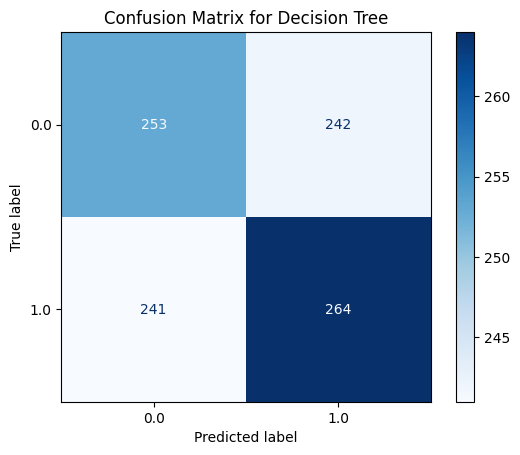

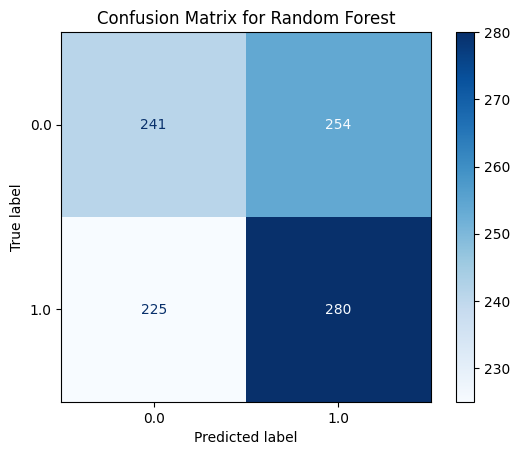

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=45009)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = random_forest.predict(X_test)

# Calculate the metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Prepare the results for Random Forest
results_rf = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf
}

# Display the results
print("Decision Tree Results:", results['Decision Tree'])
print("Random Forest Results:", results_rf)

# Plot confusion matrices and ROC curves for both models
plot_confusion_matrix_for_model(decision_tree, X_test, y_test, 'Decision Tree')
plot_confusion_matrix_for_model(random_forest, X_test, y_test, 'Random Forest')

In [72]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_regression = LogisticRegression(random_state=45009)

# Train the logistic regression model
logistic_regression.fit(X_train, y_train)

# Predict on the testing set using logistic regression
y_pred_lr = logistic_regression.predict(X_test)

# Calculate the metrics for logistic regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Update the results dictionary with logistic regression metrics
results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1 Score': f1_lr
}

print(results)


{'Decision Tree': {'Accuracy': 0.517, 'Precision': 0.516990406618553, 'Recall': 0.517, 'F1 Score': 0.516994686357049}, 'KNN': {'Accuracy': 0.516, 'Precision': 0.5158174837827104, 'Recall': 0.516, 'F1 Score': 0.5156589147286821}, 'Logistic Regression': {'Accuracy': 0.528, 'Precision': 0.5282914929157704, 'Recall': 0.528, 'F1 Score': 0.5278413769098744}}


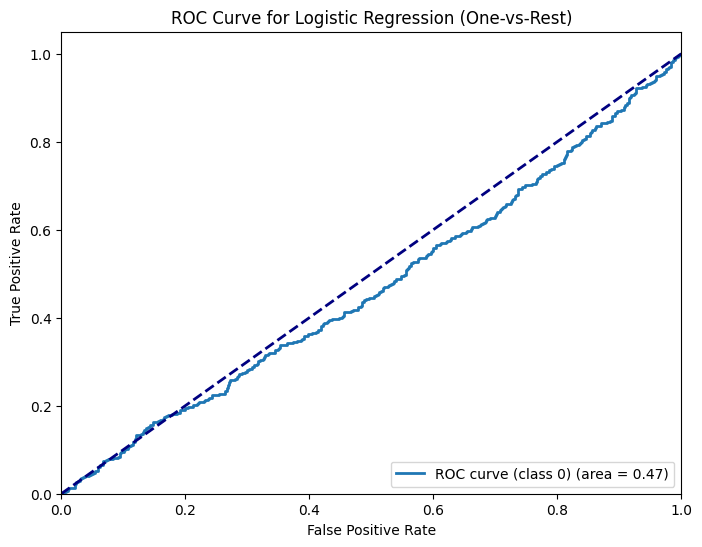

In [73]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Convert multiclass labels to binary labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Initialize the logistic regression model with OvR strategy
logistic_regression_ovr = OneVsRestClassifier(LogisticRegression(random_state=45000))

# Train the logistic regression model with OvR strategy
logistic_regression_ovr.fit(X_train, y_train)

# Predict probabilities for each class using OvR logistic regression
y_score_lr_ovr = logistic_regression_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_lr_ovr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()


In [74]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm = SVC(random_state=45009)

# Train the SVM model
svm.fit(X_train, y_train)

# Predict on the testing set using SVM
y_pred_svm = svm.predict(X_test)

# Calculate the metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Update the results dictionary with SVM metrics
results['Support Vector Machine'] = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm
}

print(results)


{'Decision Tree': {'Accuracy': 0.517, 'Precision': 0.516990406618553, 'Recall': 0.517, 'F1 Score': 0.516994686357049}, 'KNN': {'Accuracy': 0.516, 'Precision': 0.5158174837827104, 'Recall': 0.516, 'F1 Score': 0.5156589147286821}, 'Logistic Regression': {'Accuracy': 0.528, 'Precision': 0.5282914929157704, 'Recall': 0.528, 'F1 Score': 0.5278413769098744}, 'Support Vector Machine': {'Accuracy': 0.525, 'Precision': 0.5248441786590942, 'Recall': 0.525, 'F1 Score': 0.5246904775489246}}


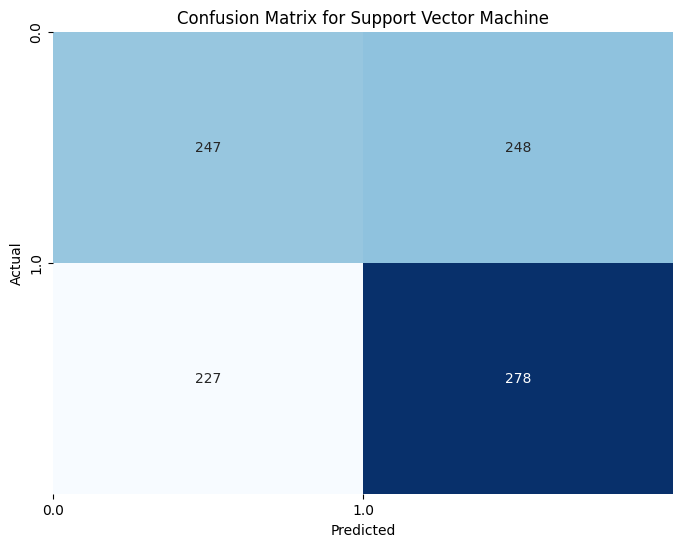

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=np.arange(len(np.unique(y))), labels=np.unique(y))
plt.yticks(ticks=np.arange(len(np.unique(y))), labels=np.unique(y))
plt.show()
